# COVID-19 Mortality Prediction with Support Vector Regression Model

### Dependencies importing

In [85]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
# python for data science
import pandas as pd
import numpy as np
import itertools

# dataviz
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import seaborn as sns 

In [87]:
 #sklearn preproc

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

import pickle

In [114]:
### TBE done!
country='France'

In [115]:
data_index = pd.read_csv(get_csv_out_path(f'index_{country}.csv'))

In [90]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-02-15,0.026779,0.0124,0.0,12.0,1.0,1.0,1.0,0.023775,0.0,0.0,0.0,0.0
1,2020-02-16,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.023775,0.0,0.0,0.0,0.0
2,2020-02-17,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.023775,0.0,0.0,0.0,0.0
3,2020-02-18,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.023775,0.0,0.0,0.0,0.0
4,2020-02-19,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.023775,0.0,0.0,0.0,0.0


In [116]:
data_index=data_index.set_index('date')

In [117]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.037264,0.030978,0.0,14.0,2.0,1.0,0.0,0.033083,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-26,0.037264,0.030978,0.0,18.0,4.0,2.0,1.0,0.033083,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-27,0.037264,0.030978,0.0,38.0,20.0,2.0,0.0,0.033083,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-28,0.037264,0.030978,0.0,57.0,19.0,2.0,0.0,0.033083,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-29,0.063456,0.077435,0.0,100.0,43.0,2.0,0.0,0.056342,0.0,0.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [118]:
data_index=data_index.fillna(0)

In [94]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.037264,0.030978,0.0,14.0,2.0,1.0,0.0,0.033083,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-26,0.037264,0.030978,0.0,18.0,4.0,2.0,1.0,0.033083,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-27,0.037264,0.030978,0.0,38.0,20.0,2.0,0.0,0.033083,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-28,0.037264,0.030978,0.0,57.0,19.0,2.0,0.0,0.033083,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-02-29,0.063456,0.077435,0.0,100.0,43.0,2.0,0.0,0.056342,0.0,0.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 0, 'Date')

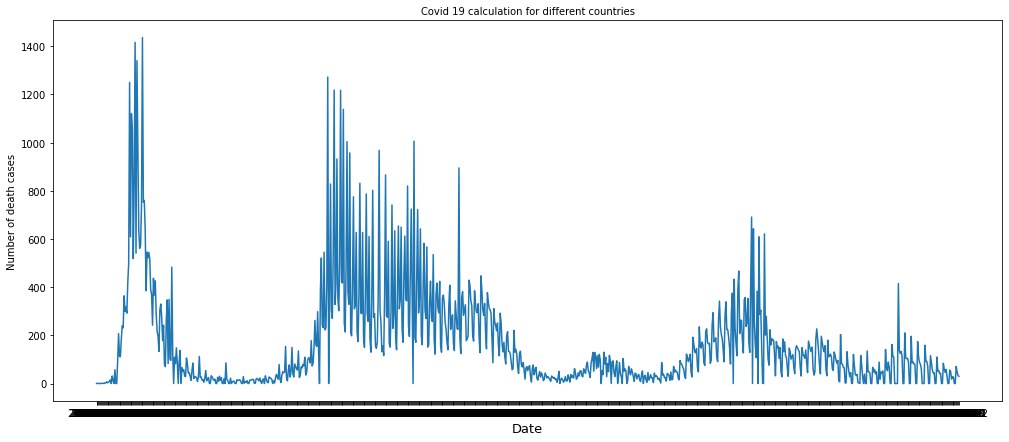

In [119]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

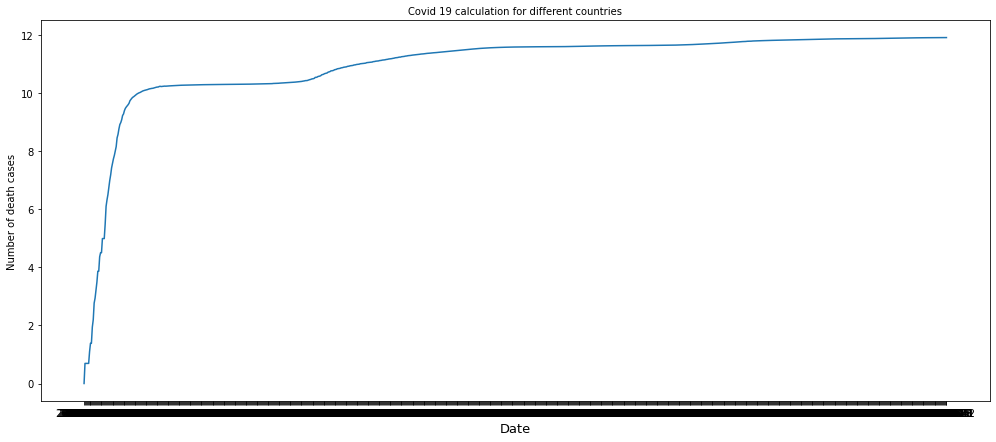

In [96]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,np.log(data_index['total_deaths']));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

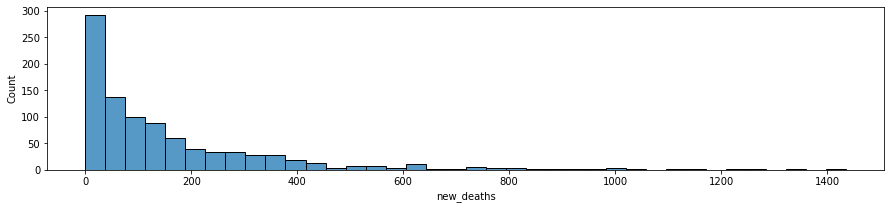

In [97]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [98]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

## scaling data

In [99]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [100]:
n = len(X)
X_train = X[0:int(n-50)]
X_test=X[int(n-50):]
y_train=y[0:int(n-50)]
y_test=y[int(n-50):]

# Model

In [101]:
model =SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

In [102]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
best=grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8,

In [103]:
best

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

## fitting the model for train and test set

In [104]:
model=best
best_model=model.fit(X_train,y_train)
best_model

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

In [106]:
best_model

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

In [107]:
country

'France'

In [108]:
with open(get_best_models_path(f'model_{country}.pkl'),'wb') as f:
    pickle.dump(best_model, f)

In [109]:
model_load=pickle.load(open(get_best_models_path(f'model_{country}.pkl'),'rb'))

In [110]:
model_load

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

## prediction

In [111]:
y_pred=best_model.predict(X_test)

## evaluating model performance

In [113]:
score=mean_absolute_percentage_error(y_test, y_pred)
n_pred=10
c=country
score, n_pred, c

(0.004744032132830774, 10, 'France')

In [ ]:
y_pred.shape

(50,)

Text(0.5, 0, 'Date')

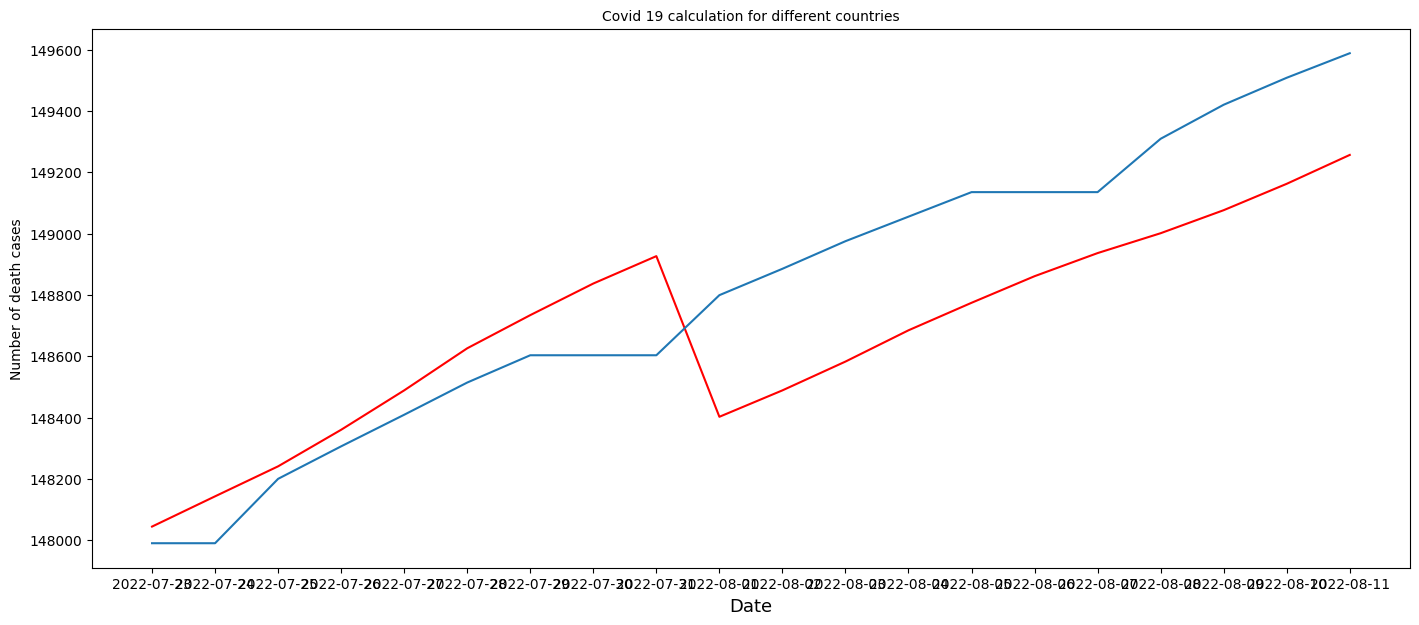

In [ ]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:20],y_pred[:20],color='r');
plt.plot(y_test.index[:20],y_test[:20]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)